In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as c

plt.rc("font", family="serif", size=16)
plt.rc("mathtext", fontset="cm")
plt.rc("lines", lw=2)

In [2]:
u = 1.
r = 1.

def f(phi, a):
    p2 = phi[0]**2 + phi[1]**2
    mu1 = -r*phi[0] + a*phi[1] + u * p2 * phi[0]
    mu2 = -r*phi[1] - a*phi[0] + u * p2 * phi[1]
    return np.array([mu1, mu2])


def l1(phi, r, a): 
    p2 = phi[0]**2 + phi[1]**2
    return -r + 2*u*p2 - np.sqrt( (u*p2)**2 - a**2 +0j)

def l2(phi, r, a): 
    p2 = phi[0]**2 + phi[1]**2
    return -r + 2*u*p2 + np.sqrt( (u*p2)**2 - a**2 +0j )

xm = lambda r, a: ( 2*r - np.sqrt(r**2 - 3*a**2 + 0j) )/3
xp = lambda r, a: ( 2*r + np.sqrt(r**2 - 3*a**2 + 0j) )/3

def Crx(x1, x2, a, r):
    mask1 = l1([x1, x2], r, a).real<0
    mask2 = l2([x1, x2], r, a).real<0
    mask = np.logical_xor(mask1, mask2)
    return np.ma.masked_where(mask==0, mask)

def Cr(x1, x2, a, r):
    mask1 = l1([x1, x2], r, a).real<0
    mask2 = l2([x1, x2], r, a).real<0
    mask = np.logical_or(mask1, mask2)
    return np.ma.masked_where(mask==0, mask)

def Ci(x1, x2, a, r):
    C = l1([x1, x2], r, a).imag
    return np.ma.masked_where(C==0, C)


def G(x1, x2, r, a):
    p = np.sqrt(x1**2 + x2**2)
    G11 = -r + u * (p**2+2*x1**2)
    G22 = -r + u * (p**2+2*x2**2)
    G12 = +a + 2*u*x1*x2
    G21 = -a + 2*u*x1*x2
    g = np.array([[G11, G12], [G21, G22]])
    g = np.moveaxis(g, (2, 3), (0, 1))
    return eig(g)[1]

In [5]:
k1, k2 = np.sqrt(3), 2

def plot(n, a, r, ax, x1, x2, k):

    ax[n//3, n%3].pcolormesh(x1, x2, Ci(x1, x2, a, r), alpha=.4, cmap='autumn', linewidth=0, antialiased=True,)
    ax[n//3, n%3].pcolormesh(x1, x2, Cr(x1, x2, a, r), alpha=.2, linewidth=0, antialiased=True, cmap=c.ListedColormap(['green']))
    ax[n//3, n%3].pcolormesh(x1, x2, Crx(x1, x2, a, r), alpha=.2, linewidth=0, antialiased=True, cmap=c.ListedColormap(['blue']))

    v1, v2 = - f([x1, x2], a)
    l = np.sqrt(v1**2 + v2**2)
    ax[n//3, n%3].streamplot(x1, x2, v1, v2, color=l, density=1., linewidth=1.5)
    ax[n//3, n%3].set_title("$\\alpha={:.2f}, r={:.2f}$".format(a, r) +  ",    $r>\\sqrt{3}\\alpha: $" + str(r>np.sqrt(3)*a) + ",    $r<2\\alpha: $" + str(r<2*a))

    theta = np.linspace(0, 2*np.pi, 100)

    if r>np.sqrt(3)*a:
        p1 = np.sqrt(xm(r, a)/u)
        ax[n//3, n%3].plot(p1*np.cos(theta), p1*np.sin(theta), 'r--', label="$|\\varphi|_-$")
        p2 = np.sqrt(xp(r, a)/u)
        ax[n//3, n%3].plot(p2*np.cos(theta), p2*np.sin(theta), 'k--', label="$|\\varphi|_+$")
        ax[n//3, n%3].legend(loc=1)

    ax[n//3, n%3].set_xlim(-k, k)
    ax[n//3, n%3].set_ylim(-k, k)

    return ax

def plot_m(n, a, r, ax, x10, x20, k, N):

    ax[n//3, n%3].plot(x10[N//2:], l1([x10[N//2:], 0], r, a).real, 'k-', label='Re$\\lambda_-$')
    ax[n//3, n%3].plot(x10[N//2:], l2([x10[N//2:], 0], r, a).real, 'r--', label='Re$\\lambda_+$')
    ax[n//3, n%3].plot(x10[N//2:], l1([x10[N//2:], 0], r, a).imag, 'g-.', alpha=.4, label='Im$\\lambda_-$')
    ax[n//3, n%3].plot(x10[N//2:], l2([x10[N//2:], 0], r, a).imag, 'b-.', alpha=.4, label='Im$\\lambda_+$')
    ax[n//3, n%3].plot(x10[N//2:], 0*x10[N//2:], 'k--', alpha=.4, lw=.2, label='$\\lambda=0$')

    if r>np.sqrt(3)*a:
        ax[n//3, n%3].plot(np.sqrt(xp(r, a)), 0, 'ko', lw=.2, label='$x_+$')
        ax[n//3, n%3].plot(np.sqrt(xm(r, a)), 0, 'ko', lw=.2, label='$x_-$')

    ax[n//3, n%3].set_title("$\\alpha={:.2f}, r={:.2f}$".format(a, r) +  ",    $r>\\sqrt{3}\\alpha: $" + str(r>np.sqrt(3)*a) + ",    $r<2\\alpha: $" + str(r<2*a))

    ax[n//3, n%3].set_xlim(.6, 1.3)
    ax[n//3, n%3].set_ylim(-1, 1)
    ax[n//3, n%3].legend(loc=2)

    return ax

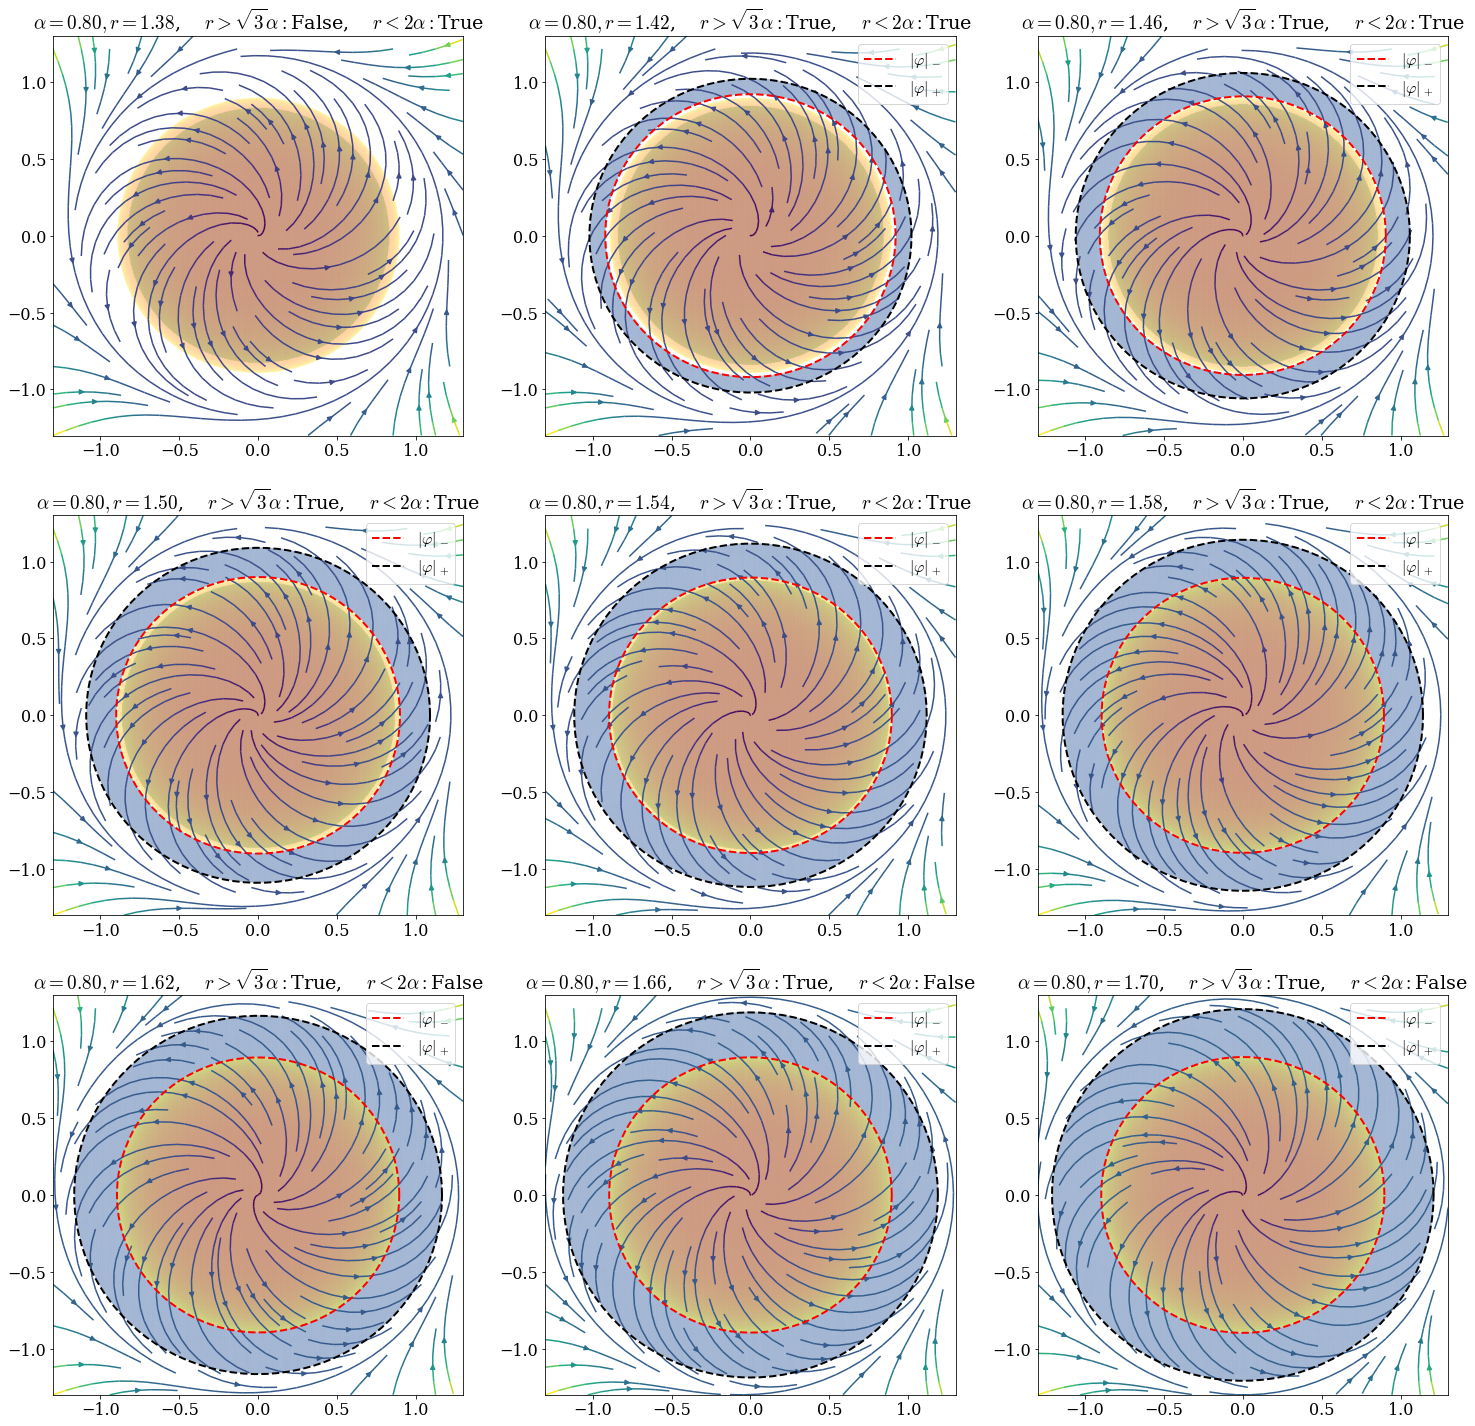

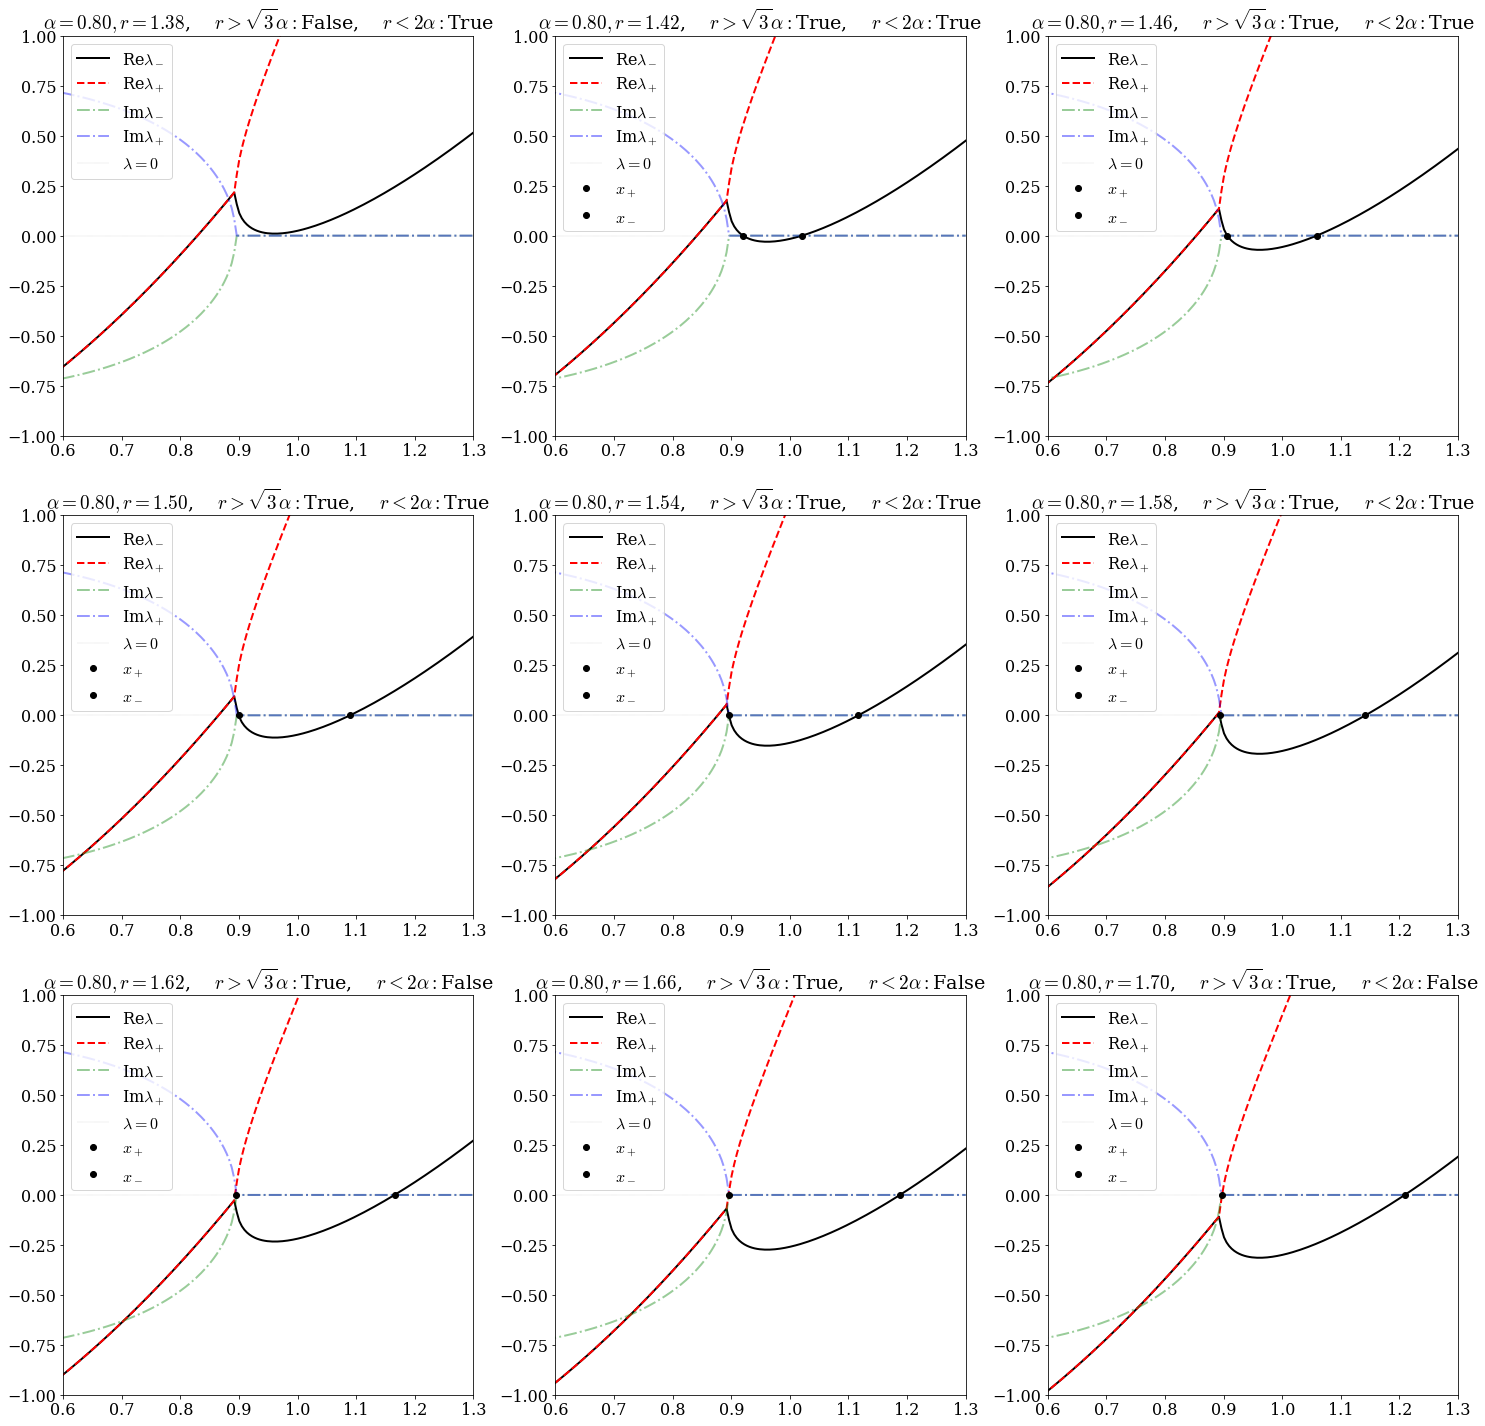

In [11]:
N = 600
k = 1.3

x10, x20 = np.linspace(-k, k, N), np.linspace(-k, k, N)
x1, x2 = np.meshgrid(x10, x20)

a = .8
rr = np.linspace(k1*a-.01, k2*a+.1, 9)

fig1, ax1 = plt.subplots(3, 3, figsize=(25, 25))
fig2, ax2 = plt.subplots(3, 3, figsize=(25, 25))
for n, r in enumerate(rr):
    plot(n, a, r, ax1, x1, x2, k)
    plot_m(n, a, r, ax2, x10, x20, k, N)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1390: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.8/dist-packages/numpy/ma/core.py:709: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


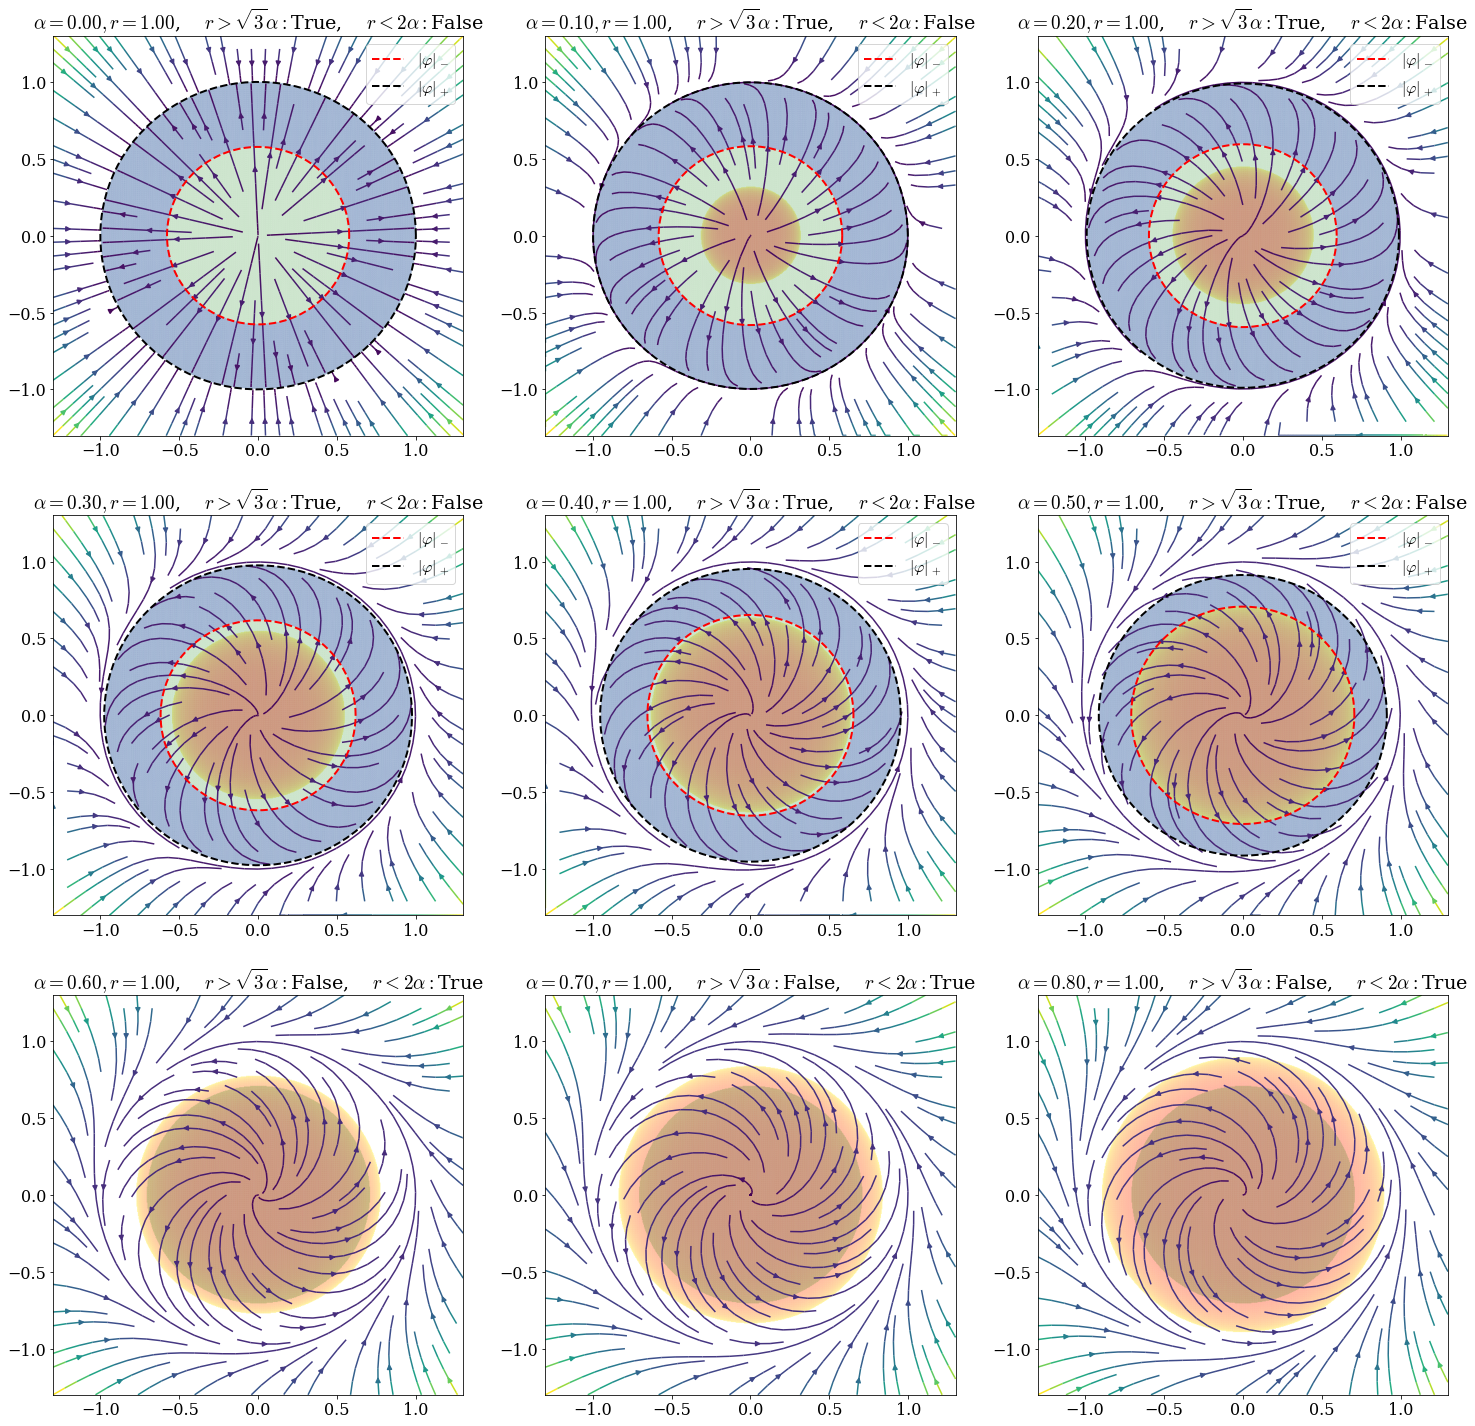

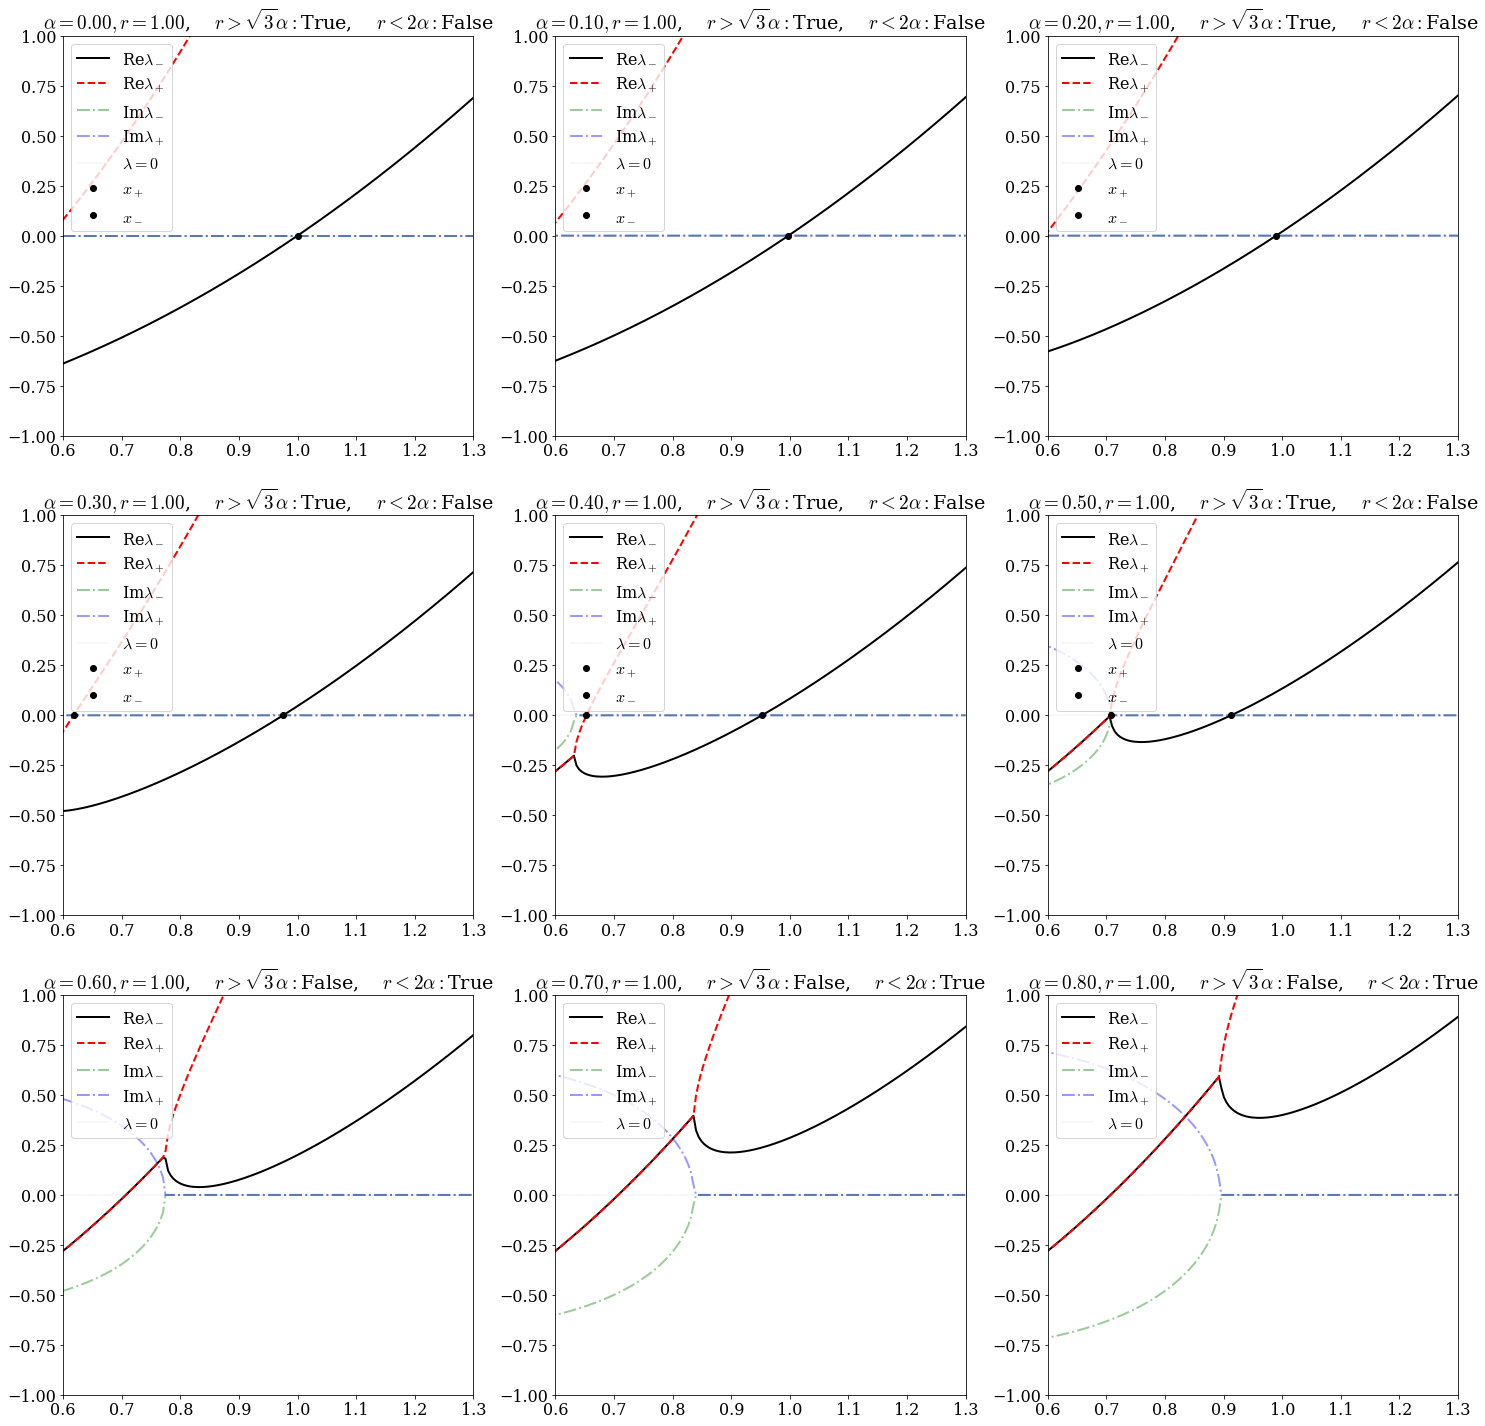

In [10]:
r = 1.
aa = np.linspace(0, .8, 9)

fig1, ax1 = plt.subplots(3, 3, figsize=(25, 25))
fig2, ax2 = plt.subplots(3, 3, figsize=(25, 25))
for n, a in enumerate(aa):
    plot(n, a, r, ax1, x1, x2, k)
    plot_m(n, a, r, ax2, x10, x20, k, N)